In [1]:
import os, os.path
import pandas as pd
import csv
import glob
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext rpy2.ipython
%reload_ext rpy2.ipython


In [2]:
%%R
library(ggplot2)
library(afex)

R[write to console]: Loading required package: lme4

R[write to console]: Loading required package: Matrix

R[write to console]: ************
Welcome to afex. For support visit: http://afex.singmann.science/

R[write to console]: - Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'S', 'KR', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- NEWS: emmeans() for ANOVA models now uses model = 'multivariate' as default.
- Get and set global package options with: afex_options()
- Set orthogonal sum-to-zero contrasts globally: set_sum_contrasts()
- For example analyses see: browseVignettes("afex")
************

R[write to console]: 
Attaching package: ‘afex’


R[write to console]: The following object is masked from ‘package:lme4’:

    lmer




In [3]:
%store -r kept

In [5]:
kept.columns

Index(['angle_l', 'angle_r', 'angle_val_l', 'angle_val_r', 'color_code_l',
       'color_code_r', 'color_l', 'color_r', 'color_value_l', 'color_value_r',
       'compound_totval', 'delta_value', 'key_press', 'num_sides_value_l',
       'num_sides_value_r', 'points_l', 'points_r', 'responses', 'rt',
       'run_id', 'shape_l', 'shape_r', 'sona_id', 'stimL', 'stimR', 'totval',
       'trial_accuracy', 'trial_index', 'ttype', 'valueL', 'valueR', 'value_l',
       'value_r', 'choose_r', 'accuracy_r', 'deltaval_learning', 'accuracy_c',
       'delta_shape', 'delta_color', 'delta_angle', 'delta_max_label',
       'delta_max_val', 'delta_shape_abs', 'delta_color_abs',
       'delta_angle_abs', 'delta_value_abs', 'delta_max_val_abs'],
      dtype='object')

In [6]:
kept[['delta_value', 'value_l', 'value_r', 'num_sides_value_l',
       'num_sides_value_r', 'delta_shape', 'angle_val_l', 'angle_val_r', 'delta_angle','delta_color', 'color_value_l', 'color_value_r']] #make sure things didn't
                                                                                            #get screwed up when i inverted signs of choice deltavals

,delta_value,value_l,value_r,num_sides_value_l,num_sides_value_r,delta_shape,angle_val_l,angle_val_r,delta_angle,delta_color,color_value_l,color_value_r
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
46794,-20.000000,53.333333,73.333333,80.0,60.0,-20.0,60.0,80.0,-20.0,-60.0,20.0,80.0
46797,-26.666667,40.000000,66.666667,60.0,80.0,20.0,20.0,60.0,-40.0,-20.0,40.0,60.0
46800,-6.666667,46.666667,53.333333,40.0,60.0,20.0,20.0,60.0,-40.0,40.0,80.0,40.0
46803,26.666667,60.000000,33.333333,60.0,20.0,-40.0,80.0,20.0,60.0,-20.0,40.0,60.0


In [7]:
#turn all delta_values R - L.
#kept.loc[:,'delta_value'] = kept.loc[:,'delta_value'] * -1
#kept.loc[:,'delta_shape'] = kept.loc[:,'delta_shape'] * -1
kept.loc[:,'delta_color'] = kept.loc[:,'delta_color'] * -1
kept.loc[:,'delta_angle'] = kept.loc[:,'delta_angle'] * -1

In [8]:
kept[['delta_value', 'value_l', 'value_r', 'num_sides_value_l',
       'num_sides_value_r', 'delta_shape', 'angle_val_l', 'angle_val_r', 'delta_angle','delta_color', 'color_value_l', 'color_value_r']]

,delta_value,value_l,value_r,num_sides_value_l,num_sides_value_r,delta_shape,angle_val_l,angle_val_r,delta_angle,delta_color,color_value_l,color_value_r
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
46794,-20.000000,53.333333,73.333333,80.0,60.0,-20.0,60.0,80.0,20.0,60.0,20.0,80.0
46797,-26.666667,40.000000,66.666667,60.0,80.0,20.0,20.0,60.0,40.0,20.0,40.0,60.0
46800,-6.666667,46.666667,53.333333,40.0,60.0,20.0,20.0,60.0,40.0,-40.0,80.0,40.0
46803,26.666667,60.000000,33.333333,60.0,20.0,-40.0,80.0,20.0,-60.0,20.0,40.0,60.0


In [57]:
kept.loc[:,'delta_angle'] = kept.loc[:,'delta_angle'] * -1

In [58]:
# kept[['delta_value', 'value_l', 'value_r', 'color_value_r','color_value_l', 'delta_color', 
#       'angle_val_r', 'angle_val_l', 'delta_angle', 'num_sides_value_r','num_sides_value_l', 'delta_shape']]

,delta_value,value_l,value_r,color_value_r,color_value_l,delta_color,angle_val_r,angle_val_l,delta_angle,num_sides_value_r,num_sides_value_l,delta_shape
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
46794,20.000000,53.333333,73.333333,80.0,20.0,60.0,80.0,60.0,20.0,60.0,80.0,-20.0
46797,26.666667,40.000000,66.666667,60.0,40.0,20.0,60.0,20.0,40.0,80.0,60.0,20.0
46800,6.666667,46.666667,53.333333,40.0,80.0,-40.0,60.0,20.0,40.0,60.0,40.0,20.0
46803,-26.666667,60.000000,33.333333,60.0,40.0,20.0,20.0,80.0,-60.0,20.0,60.0,-40.0


In [9]:
def take_abs(df, colnames):
    for name in colnames:
        df[str(name)+"_abs"] = abs(df[str(name)])
    #return df

abs_cols = ['delta_shape', 'delta_color', 'delta_angle', 'delta_value', 'delta_max_val'] 

In [10]:
take_abs(kept, abs_cols)


In [11]:
kept.columns

Index(['angle_l', 'angle_r', 'angle_val_l', 'angle_val_r', 'color_code_l',
       'color_code_r', 'color_l', 'color_r', 'color_value_l', 'color_value_r',
       'compound_totval', 'delta_value', 'key_press', 'num_sides_value_l',
       'num_sides_value_r', 'points_l', 'points_r', 'responses', 'rt',
       'run_id', 'shape_l', 'shape_r', 'sona_id', 'stimL', 'stimR', 'totval',
       'trial_accuracy', 'trial_index', 'ttype', 'valueL', 'valueR', 'value_l',
       'value_r', 'choose_r', 'accuracy_r', 'deltaval_learning', 'accuracy_c',
       'delta_shape', 'delta_color', 'delta_angle', 'delta_max_label',
       'delta_max_val', 'delta_shape_abs', 'delta_color_abs',
       'delta_angle_abs', 'delta_value_abs', 'delta_max_val_abs'],
      dtype='object')

In [12]:
kept.drop(columns=['delta_max_label'], inplace = True) #causing issues with R fix later

In [102]:
#####full models accuracy/choose_r from delta_SAC, delta_SAC|subject

In [13]:
%%R -i kept
full_model <- glmer(accuracy_c ~ delta_shape_abs + delta_color_abs+ delta_angle_abs + delta_value_abs + 
                    (delta_shape_abs|run_id)+ (delta_color_abs|run_id)+ (delta_angle_abs|run_id)+
                    (delta_value_abs|run_id), family = binomial, data = kept, control = glmerControl(optimizer = "bobyqa"))

#summary(full_model)



R[write to console]: boundary (singular) fit: see ?isSingular



In [14]:
%%R  
full_model2 <- glmer(choose_r ~ delta_shape + delta_color+ delta_angle + delta_value + 
                    (delta_shape|run_id)+ (delta_color|run_id)+ (delta_angle|run_id)+
                    (delta_value|run_id), family = binomial, data = kept, control = glmerControl(optimizer = "bobyqa"))
summary(full_model2)

R[write to console]: fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

R[write to console]: boundary (singular) fit: see ?isSingular



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choose_r ~ delta_shape + delta_color + delta_angle + delta_value +  
    (delta_shape | run_id) + (delta_color | run_id) + (delta_angle |  
    run_id) + (delta_value | run_id)
   Data: kept
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  3380.4   3479.4  -1674.2   3348.4     3584 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.7570 -0.5129 -0.0747  0.5129  6.5343 

Random effects:
 Groups   Name        Variance  Std.Dev.  Corr
 run_id   (Intercept) 0.000e+00 0.0000000     
          delta_shape 8.584e-04 0.0292991  NaN
 run_id.1 (Intercept) 4.026e-02 0.2006404     
          delta_color 3.057e-04 0.0174838 0.10
 run_id.2 (Intercept) 4.966e-03 0.0704671     
          delta_angle 1.086e-04 0.0104235 1.00
 run_id.3 (Intercept) 4.235e-04 0.0205795     
          delta_value 9.300e-10 0.0000305 1.0

In [15]:
kept.accuracy_r

3        1
6        1
9        1
12       0
15       0
        ..
46794    0
46797    0
46800    0
46803    0
46806    0
Name: accuracy_r, Length: 11757, dtype: int64

In [16]:
#####shape models accuracy/choose_r from delta_SAC, delta_SAC|subject

In [17]:
%%R
shape = subset(kept, ttype == 'shape')
shape_model <- glmer(accuracy_r ~ abs(deltaval_learning) +(abs(deltaval_learning)|run_id), family = binomial, 
                     data = shape, control = glmerControl(optimizer = "bobyqa"))
summary(shape_model)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: accuracy_r ~ abs(deltaval_learning) + (abs(deltaval_learning) |  
    run_id)
   Data: shape
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  1425.6   1453.9   -707.8   1415.6     2144 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.9773  0.1800  0.2879  0.3989  2.3855 

Random effects:
 Groups Name                   Variance  Std.Dev. Corr
 run_id (Intercept)            0.4637224 0.68097      
        abs(deltaval_learning) 0.0005224 0.02286  0.37
Number of obs: 2149, groups:  run_id, 36

Fixed effects:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            1.199480   0.226550   5.295 1.19e-07 ***
abs(deltaval_learning) 0.033979   0.007634   4.451 8.55e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
       

In [18]:
%%R
shape = subset(kept, ttype == 'shape')
shape_model2 <- glmer(choose_r ~ deltaval_learning +(deltaval_learning|run_id), family = binomial, 
                     data = shape, control = glmerControl(optimizer = "bobyqa"))
summary(shape_model2)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choose_r ~ deltaval_learning + (deltaval_learning | run_id)
   Data: shape
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  1449.0   1477.3   -719.5   1439.0     2144 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-10.7749  -0.3308   0.0295   0.3552  18.7152 

Random effects:
 Groups Name              Variance Std.Dev. Corr
 run_id (Intercept)       0.167572 0.40936      
        deltaval_learning 0.001921 0.04383  0.05
Number of obs: 2149, groups:  run_id, 36

Fixed effects:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.025405   0.104798   0.242    0.808    
deltaval_learning 0.077056   0.008032   9.594   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
dltvl_lrnng 0.023 


In [19]:
#####color models accuracy/choose_r from delta_SAC, delta_SAC|subject

In [20]:
%%R
color = subset(kept, ttype == 'color')
color_model <- glmer(accuracy_r ~ abs(deltaval_learning) +(abs(deltaval_learning)|run_id), family = binomial, 
                     data = color , control = glmerControl(optimizer = "bobyqa"))
summary(color_model)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: accuracy_r ~ abs(deltaval_learning) + (abs(deltaval_learning) |  
    run_id)
   Data: color
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  2631.5   2660.8  -1310.7   2621.5     2577 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0707  0.2644  0.4167  0.5629  1.1216 

Random effects:
 Groups Name                   Variance  Std.Dev. Corr 
 run_id (Intercept)            0.6227106 0.78912       
        abs(deltaval_learning) 0.0001887 0.01374  -0.51
Number of obs: 2582, groups:  run_id, 36

Fixed effects:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            0.624454   0.183619   3.401 0.000672 ***
abs(deltaval_learning) 0.022270   0.004485   4.965 6.86e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
    

In [21]:
%%R
color_model2 <- glmer(choose_r ~ deltaval_learning + (deltaval_learning|run_id), family = binomial, 
                     data = color, control = glmerControl(optimizer = "bobyqa"))
summary(color_model2)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choose_r ~ deltaval_learning + (deltaval_learning | run_id)
   Data: color
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  2641.9   2671.2  -1316.0   2631.9     2577 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.8848 -0.5532  0.1701  0.6215  7.6259 

Random effects:
 Groups Name              Variance  Std.Dev. Corr 
 run_id (Intercept)       0.1054630 0.32475       
        deltaval_learning 0.0004125 0.02031  -0.55
Number of obs: 2582, groups:  run_id, 36

Fixed effects:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.009281   0.074669   0.124    0.901    
deltaval_learning 0.041723   0.003801  10.976   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
dltvl_lrnng -0.370


In [22]:
####angle

In [23]:
%%R
angle = subset(kept, ttype == 'angle')
angle_model <- glmer(accuracy_r ~ abs(deltaval_learning) +(abs(deltaval_learning)|run_id), family = binomial, 
                     data = angle, control = glmerControl(optimizer = "bobyqa"))
summary(angle_model)
#coef(angle_model)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: accuracy_r ~ abs(deltaval_learning) + (abs(deltaval_learning) |  
    run_id)
   Data: angle
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  4337.8   4368.5  -2163.9   4327.8     3421 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9925 -1.0741  0.5420  0.8107  1.1575 

Random effects:
 Groups Name                   Variance  Std.Dev. Corr
 run_id (Intercept)            0.1853983 0.4306       
        abs(deltaval_learning) 0.0001368 0.0117   0.03
Number of obs: 3426, groups:  run_id, 36

Fixed effects:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            0.157310   0.116717   1.348    0.178    
abs(deltaval_learning) 0.013837   0.003296   4.199 2.68e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
       

In [24]:
%%R
angle_model2 <- glmer(choose_r ~ deltaval_learning +(deltaval_learning|run_id), family = binomial, 
                     data = angle, control = glmerControl(optimizer = "bobyqa"))
summary(angle_model)
#coef(angle_model)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: accuracy_r ~ abs(deltaval_learning) + (abs(deltaval_learning) |  
    run_id)
   Data: angle
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  4337.8   4368.5  -2163.9   4327.8     3421 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9925 -1.0741  0.5420  0.8107  1.1575 

Random effects:
 Groups Name                   Variance  Std.Dev. Corr
 run_id (Intercept)            0.1853983 0.4306       
        abs(deltaval_learning) 0.0001368 0.0117   0.03
Number of obs: 3426, groups:  run_id, 36

Fixed effects:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            0.157310   0.116717   1.348    0.178    
abs(deltaval_learning) 0.013837   0.003296   4.199 2.68e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
       

In [47]:
%%R
coef_full = coef(full_model)
coef_full = unname(unlist(coef_full)[37:72])
coef_S = coef(shape_model)
coef_S = unname(unlist(coef_S)[37:72])

coef_C = coef(color_model)
coef_C = unname(unlist(coef_C)[37:72])

coef_A = coef(angle_model)
coef_A = unname(unlist(coef_A)[37:72])

#coef df
coef_df <- data.frame(coef_full, coef_S, coef_C, coef_A)

plt1<-ggplot(coef_df, aes(x = coef_S, y = coef_full)) + 
        geom_point()+ geom_smooth(method = lm) + theme_bw() + ggtitle("Shape")

plt1

plt2<-ggplot(coef_df, aes(x = coef_C, y = coef_full)) + 
        geom_point()+ geom_smooth(method = lm) + theme_bw() + ggtitle("Color")



plt3<-ggplot(coef_df, aes(x = coef_A, y = coef_full)) + 
        geom_point()+ geom_smooth(method = lm) + theme_bw() + ggtitle("Angle")


In [26]:
#Coef version of last week's plots

In [30]:
kept['SC_deltaval'] = kept[['delta_shape', 'delta_color']].mean(axis=1)

In [31]:
###rerun models with new Shape-Color determined deltaval

In [32]:
%%R -i kept
simple_model_modify_val <- glmer(accuracy_c ~ abs(SC_deltaval) + 
                    (abs(SC_deltaval)|run_id), family = binomial, data = kept, control = glmerControl(optimizer = "bobyqa"))

summary(simple_model_modify_val)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: accuracy_c ~ abs(SC_deltaval) + (abs(SC_deltaval) | run_id)
   Data: kept
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  3423.9   3454.3  -1706.9   3413.9     3224 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.8543 -0.8255  0.3563  0.6330  1.8250 

Random effects:
 Groups Name             Variance  Std.Dev. Corr 
 run_id (Intercept)      0.1327883 0.36440       
        abs(SC_deltaval) 0.0007535 0.02745  -0.36
Number of obs: 3229, groups:  run_id, 36

Fixed effects:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.235384   0.087710  -2.684  0.00728 ** 
abs(SC_deltaval)  0.062456   0.005603  11.146  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
abs(SC_dlt) -0.506


In [33]:
%%R -i kept
full_model_modify_val <- glmer(accuracy_c ~ abs(SC_deltaval) + delta_shape_abs + delta_color_abs+ delta_angle_abs +
                               (delta_shape_abs|run_id)+ (delta_color_abs|run_id)+ (delta_angle_abs|run_id)+
                    (abs(SC_deltaval)|run_id), family = binomial, data = kept, control = glmerControl(optimizer = "bobyqa"))


summary(full_model_modify_val)

R[write to console]: boundary (singular) fit: see ?isSingular



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: accuracy_c ~ abs(SC_deltaval) + delta_shape_abs + delta_color_abs +  
    delta_angle_abs + (delta_shape_abs | run_id) + (delta_color_abs |  
    run_id) + (delta_angle_abs | run_id) + (abs(SC_deltaval) |      run_id)
   Data: kept
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  3365.7   3469.1  -1665.9   3331.7     3212 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.8028 -0.7517  0.3378  0.5993  1.8100 

Random effects:
 Groups   Name             Variance  Std.Dev. Corr 
 run_id   (Intercept)      0.1139715 0.33760       
          delta_shape_abs  0.0001747 0.01322  -1.00
 run_id.1 (Intercept)      0.1593417 0.39918       
          delta_color_abs  0.0001768 0.01330  -0.93
 run_id.2 (Intercept)      0.1042204 0.32283       
          delta_angle_abs  0.0002803 0.01674  -0.96
 run_id.3 (Inter

In [36]:
%%R 
#shape = subset(kept, ttype == 'shape')
#color = subset(kept, ttype == 'color')
#angle = subset(kept, ttype == 'angle')

coef_modify_dval= coef(full_model_modify_val)
coef_modify_dval = unname(unlist(coef_modify_dval)[37:72])

In [53]:
%%R 

coef_df_mod <- data.frame(coef_modify_dval, coef_S, coef_C, coef_A)

plt1_mod<-ggplot(coef_df_mod, aes(x = coef_S, y = coef_modify_dval)) + 
        geom_point()+ geom_smooth(method = lm) + theme_bw() + ggtitle("Shape")



plt2_mod<-ggplot(coef_df_mod, aes(x = coef_C, y = coef_modify_dval)) + 
        geom_point()+ geom_smooth(method = lm) + theme_bw() + ggtitle("Color")

plt3_mod<-ggplot(coef_df_mod, aes(x = coef_A, y = coef_modify_dval)) + 
        geom_point()+ geom_smooth(method = lm) + theme_bw() + ggtitle("Angle")


R[write to console]: `geom_smooth()` using formula 'y ~ x'



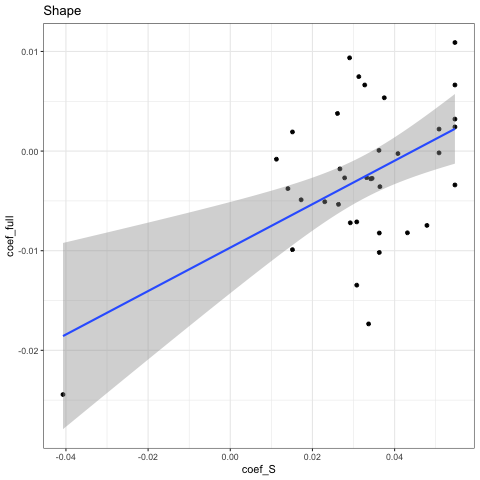

In [54]:
%%R
plt1

R[write to console]: `geom_smooth()` using formula 'y ~ x'



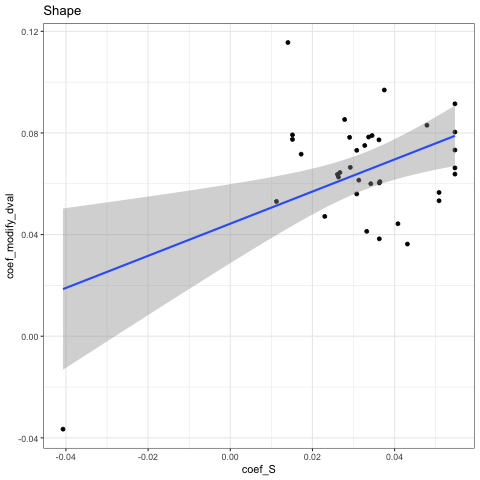

In [55]:
%%R
plt1_mod

R[write to console]: `geom_smooth()` using formula 'y ~ x'



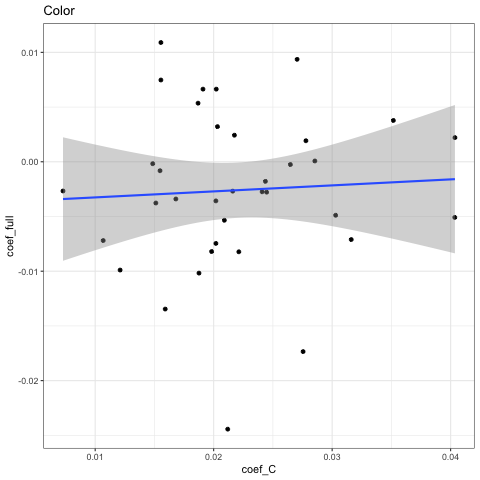

In [56]:
%%R
plt2

R[write to console]: `geom_smooth()` using formula 'y ~ x'



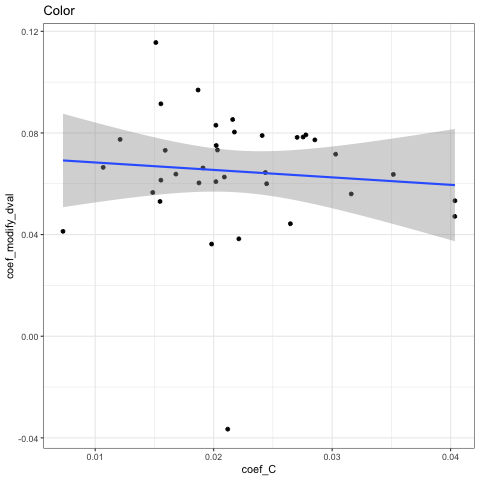

In [51]:
%%R
plt2_mod

R[write to console]: `geom_smooth()` using formula 'y ~ x'



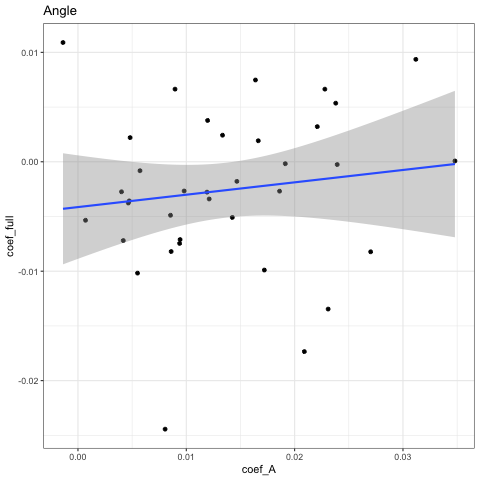

In [57]:
%%R
plt3

R[write to console]: `geom_smooth()` using formula 'y ~ x'



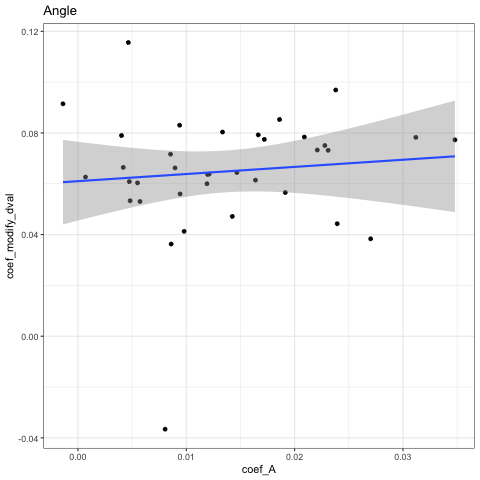

In [58]:
%%R
plt3_mod